# $k$-Neareat Neighbors Classification Algorithm
[Dr Kieu's Lecture Notes on $k$-NN](http://120.108.116.237/~ktduc/DA/Lecs/Topic01%20Classification%20Alternatives%20Jiawei%20Han.pdf)  
Explaining the algorithm

## Python Implemenation (scikit learn) with [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


### Importing modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Reading data from `diabetes.csv`

In [9]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Getting values (X) and labels (y)

In [10]:
X = df.drop('Outcome', axis=1).values

# ALTERNATIVE:
# X = df.loc[:,:'Age']

y = df['Outcome'].values

### Normalizing Values (X) with [`sklearn.preprocessing.Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)
**Data normalization** (aka feature scaling): We normalize the values of each attribute before computing proximity measure (e.g., Euclidean distance). This helps prevent attributes with large ranges (e.g., weight) from outweighing attributes with smaller ranges (e.g., height).  

Hence, every sklearn's transform's `fit()` just calculates the parameters (e.g. $μ$ and $σ$ in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its `transform()` method to apply the transformation to a particular set of examples.

`fit_transform()` joins these two steps and is used for the initial fitting of parameters on the training set 

[In summary:](https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn)

- Step 1: fit the scaler on the TRAINING data
- Step 2: use the scaler to transform the training data
- Step 3: use the transformed training data to fit the predictive model
- Step 4: use the scaler to transform the TEST data
- Step 5: predict using the trained model and the transformed TEST data

**We will use `transformer` to transform `x_train` and `x_test`**

In [12]:
transformer = Normalizer().fit(X)

 ### Training the model and testing accuracy with different values of k
 Same idea as the **Elbow Curve** method for $k$-Means
- test_size determines the train/test data split (0.4 test, 0.6 train)
- the code will test different values of $k$ for $1 \leq k \leq 9$
- [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html)`([start, ]stop, [step, ]dtype=None)`
Return evenly spaced values within a given interval. Values are generated within the half-open interval [start, stop) (in other words, the interval including start but excluding stop). For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list. hen using a non-integer step, such as 0.1, the results will often not be consistent. It is better to use linspace for these cases.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

# normalizing with the help of transformer
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

# np.arange creates an array with values 1 to 9
neighbors = np.arange(1, 10)  
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# enumerate adds a counter to an iterable
# in this loop, we are trying different values of k to see which is best
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
    
# printing accuracy
print('Training accuracy: {}\n\nTesting accuracy: {}'.format(train_accuracy, test_accuracy))

Training accuracy: [1.         0.78695652 0.8173913  0.76304348 0.77391304 0.75
 0.74565217 0.73478261 0.71304348]

Testing accuracy: [0.59090909 0.63311688 0.66233766 0.69480519 0.71428571 0.72077922
 0.72077922 0.72077922 0.69805195]


### Visualising accuracy as graphs

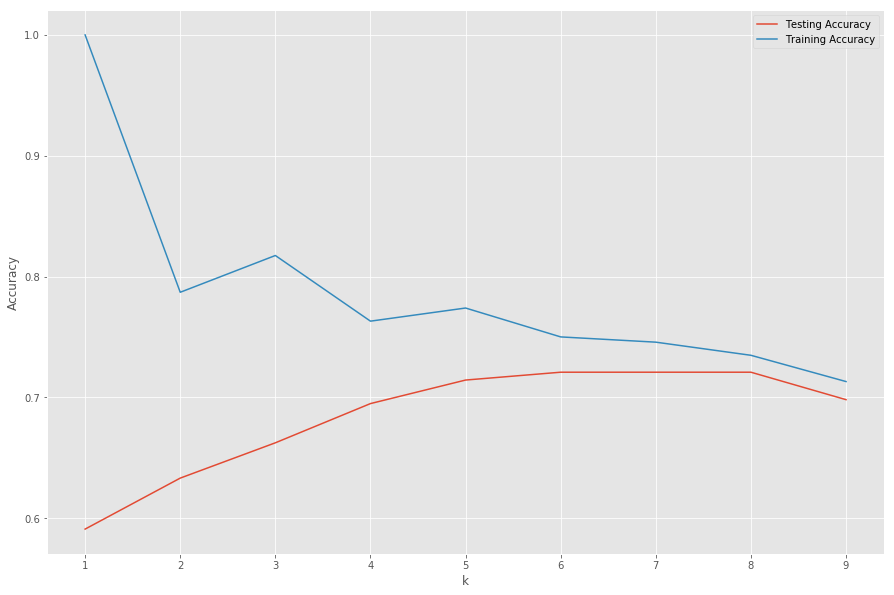

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

**now that we have determined that n_neighbors is optimal at a value of 7, we can re-run using only 7**

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))  # prints accuracy
y_pred = knn.predict(X_test)

0.7435064935064936


***
***
### Classification Metrics


### [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.
\begin{bmatrix}
    TN & FP \\
    FN & TP \\
\end{bmatrix}  


In [12]:
print(confusion_matrix(y_test, y_pred))

[[174  27]
 [ 52  55]]


### [`sklearn.metrics.f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
\begin{align*}
    F_1 &= \left (\frac{\text{recall}^{-1} + \text{precision}^{-1}}{2}\right )^{-1}\\\\
        &= \frac{2\times precision \times recall}{precision + recall}
\end{align*}



In [13]:
print(f1_score(y_test, y_pred))

0.5820105820105819


### [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [14]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.87      0.81       201
          1       0.67      0.51      0.58       107

avg / total       0.74      0.74      0.73       308

